In [1]:
import pickle
import glob
import os
import healpy as hp
import numpy as np
from matplotlib import pyplot as plt
import qubic
from qubic import AnalysisMC as amc
from qubic import QubicSkySim as qss
from pysimulators.interfaces.healpy import HealpixConvolutionGaussianOperator
%matplotlib notebook

# def get_angular_profile(

# def get_covcorr_patch(

# frequency map making draft
# https://www.overleaf.com/project/6369768540d82b0bb1dca793
# https://arxiv.org/pdf/0804.2645.pdf

In [4]:
# map_dict = pickle.load(open('CMM1_1_28_1.pkl','rb'))

#'cmm_cmb_d0_exactinitial_seed1/cmm*'
thedir = '/home/oem/data/foldertest_1_seed1/maps'
dic_name = 'test_*'
realizations = np.sort(glob.glob(thedir + '/' + dic_name))

for i in range(len(realizations)):
    print(i, realizations[i])
    
# map_dict = pickle.load(open('CMM_330_1.pkl','rb'))
# print(map_dict)

# dataset_info = str.split(thedatadir,'/')[-1]

0 /home/oem/data/foldertest_1_seed1/maps/test_482_24.pkl
1 /home/oem/data/foldertest_1_seed1/maps/test_485_21.pkl
2 /home/oem/data/foldertest_1_seed1/maps/test_492_22.pkl
3 /home/oem/data/foldertest_1_seed1/maps/test_492_23.pkl
4 /home/oem/data/foldertest_1_seed1/maps/test_519_14.pkl
5 /home/oem/data/foldertest_1_seed1/maps/test_519_32.pkl
6 /home/oem/data/foldertest_1_seed1/maps/test_519_37.pkl
7 /home/oem/data/foldertest_1_seed1/maps/test_519_48.pkl
8 /home/oem/data/foldertest_1_seed1/maps/test_521_11.pkl
9 /home/oem/data/foldertest_1_seed1/maps/test_521_17.pkl
10 /home/oem/data/foldertest_1_seed1/maps/test_521_31.pkl
11 /home/oem/data/foldertest_1_seed1/maps/test_521_40.pkl
12 /home/oem/data/foldertest_1_seed1/maps/test_521_7.pkl
13 /home/oem/data/foldertest_1_seed1/maps/test_523_12.pkl
14 /home/oem/data/foldertest_1_seed1/maps/test_523_28.pkl
15 /home/oem/data/foldertest_1_seed1/maps/test_523_29.pkl
16 /home/oem/data/foldertest_1_seed1/maps/test_523_34.pkl
17 /home/oem/data/foldert

In [5]:
# fwhm_plot = 0.0078
# convolution_plot = HealpixConvolutionGaussianOperator(fwhm_plot)

noise_maps = []
components_maps = []
components_input_maps = []
# convolved_components = convolution_plot(components)
for i,real in enumerate(realizations):
    map_dict = pickle.load(open(real,'rb'))
    components = map_dict['components_i'] 
    components_input = map_dict['components']
    noise = map_dict['components_i'] - map_dict['components']
    coverage = map_dict['coverage']#it is the same for every realization
    seenpix = map_dict['seenpix']#it is the same for every realization
    noise_maps.append(noise)
    components_maps.append(components)
    components_input_maps.append(components_input)
noise_maps = np.array(noise_maps)
components_maps = np.array(components_maps)
components_input_maps = np.array(components_input_maps)

# print(coverage)
print(noise_maps.shape)
print(components_maps.shape)
print(components_input_maps.shape)
# print(noise_maps[2])
# print(map_dict['components_i']-map_dict['components'])

(50, 2, 786432, 3)
(50, 2, 786432, 3)
(50, 2, 786432, 3)


In [68]:
nreals = noise_maps.shape[0]
ncomps = noise_maps.shape[1]
npix_tot = noise_maps.shape[2]
nstokes = noise_maps.shape[3]

# thr = 0.2
# seenpix = coverage/coverage.max() > thr

noise_maps_patch = noise_maps[:,:,seenpix,:]
# print(sum(seenpix))
print(noise_maps_patch.shape)

(50, 2, 22928, 3)


In [55]:
cov, corr = amc.get_covcorr_patch(noise_maps_patch,stokesjoint=True)#,doplot=True) #maps.shape should be (nreals, ncomps, npix_patch, nstokes)

<IPython.core.display.Javascript object>


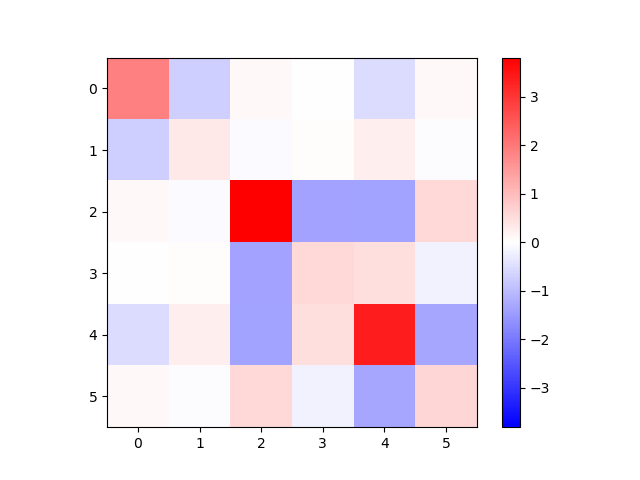

(6, 6, 22928)


<IPython.core.display.Javascript object>


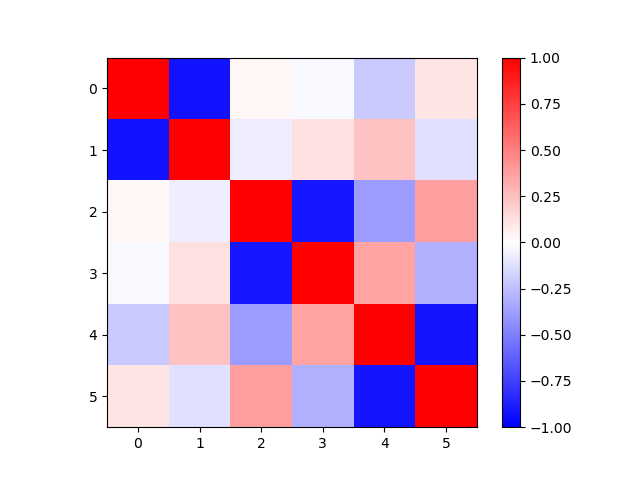

(6, 6, 22928)


In [56]:
ipix = 10000

plt.figure()
vmax = np.max(np.abs(cov[:, :, ipix]))
plt.imshow(cov[:, :, ipix], vmin=-vmax, vmax=vmax, cmap='bwr')
# plt.title('Covariance pixel 0')
plt.colorbar()
print(cov.shape)

plt.figure()
vmax = np.max(np.abs(corr[:, :, ipix]))
plt.imshow(corr[:, :, ipix], vmin=-vmax, vmax=vmax, cmap='bwr')
# plt.title('Covariance pixel 0')
plt.colorbar()
print(corr.shape)

<IPython.core.display.Javascript object>


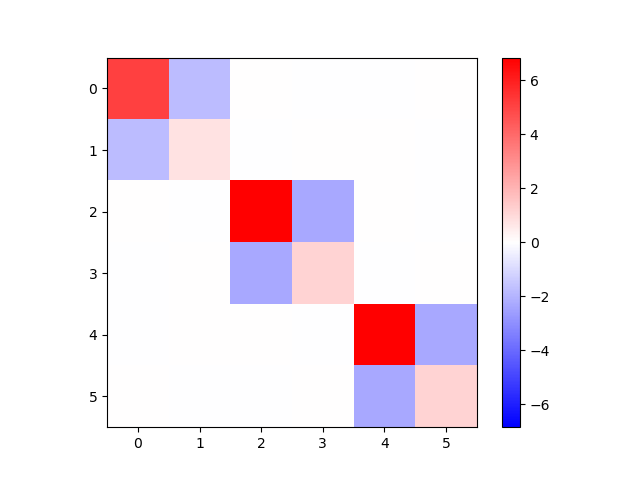

<IPython.core.display.Javascript object>


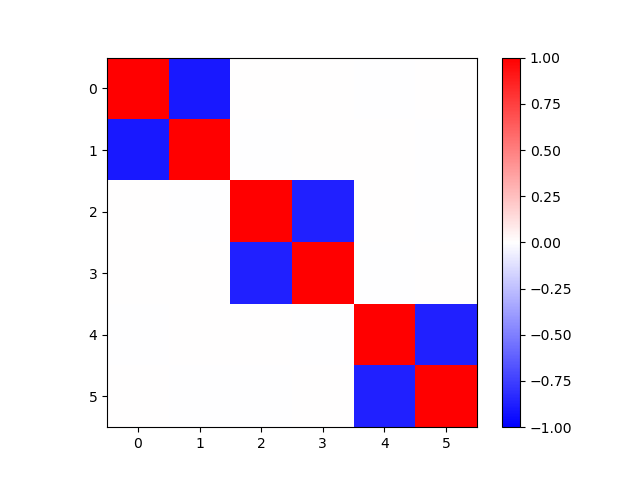

In [57]:
cov_mean = np.mean(cov,2)
corr_mean = np.mean(corr,2)

plt.figure()
vmax = np.max(np.abs(cov_mean))
plt.imshow(cov_mean, vmin=-vmax, vmax=vmax, cmap='bwr')
# plt.title('Covariance pixel 0')
plt.colorbar()
# print(cov_mean.shape)

plt.figure()
vmax = np.max(np.abs(corr_mean))
plt.imshow(corr_mean, vmin=-vmax, vmax=vmax, cmap='bwr')
# plt.title('Covariance pixel 0')
plt.colorbar()
# print(corr_mean.shape)

In [58]:
print(noise_maps_patch.shape)

(50, 2, 22928, 3)


In [7]:
from importlib import reload
# reload(ft)
reload(qss)

center_equ = [0,-57]
center_gal = qubic.equ2gal(center_equ[0], center_equ[1])
print(np.array([center_gal[0],center_gal[1]]))
# self.center[0],self.center[1]

[316.44761929 -58.75808063]


In [60]:
# plt.figure()
nside=256
pixsnum_seenpix = np.where(seenpix)[0]
centralpix = hp.ang2pix(nside, center_gal[0],center_gal[1],lonlat=True)
angmax= np.max(qss.get_angles(centralpix,pixsnum_seenpix,nside))
print(angmax)


20.77760958962067


In [61]:
nbins = 1
integrated = True

I_int_d0 = np.zeros((nreals,nbins))
Q_int_d0 = np.zeros((nreals,nbins))
U_int_d0 = np.zeros((nreals,nbins))
dI_int_d0 = np.zeros((nreals,nbins))
dQ_int_d0 = np.zeros((nreals,nbins))
dU_int_d0 = np.zeros((nreals,nbins))
I_int_cmb = np.zeros((nreals,nbins))
Q_int_cmb = np.zeros((nreals,nbins))
U_int_cmb = np.zeros((nreals,nbins))
dI_int_cmb = np.zeros((nreals,nbins))
dQ_int_cmb = np.zeros((nreals,nbins))
dU_int_cmb = np.zeros((nreals,nbins))


for i in range(nreals):
    angs_int_d0,I_int_d0[i,:],Q_int_d0[i,:],U_int_d0[i,:],dI_int_d0[i,:],dQ_int_d0[i,:],dU_int_d0[i,:] = qss.get_angular_profile(noise_maps[i,1,:,:],thmax=angmax,nbins=nbins,doplot=False,allstokes=True,separate=True,integrated=integrated,center=center_gal)
    angs_int_cmb,I_int_cmb[i,:],Q_int_cmb[i,:],U_int_cmb[i,:],dI_int_cmb[i,:],dQ_int_cmb[i,:],dU_int_cmb[i,:] = qss.get_angular_profile(noise_maps[i,0,:,:],thmax=angmax,nbins=nbins,doplot=False,allstokes=True,separate=True,integrated=integrated,center=center_gal)
    

In [62]:
nbins = 25
angmax = 30
integrated = False

I_d0 = np.zeros((nreals,nbins))
Q_d0 = np.zeros((nreals,nbins))
U_d0 = np.zeros((nreals,nbins))
dI_d0 = np.zeros((nreals,nbins))
dQ_d0 = np.zeros((nreals,nbins))
dU_d0 = np.zeros((nreals,nbins))
I_cmb = np.zeros((nreals,nbins))
Q_cmb = np.zeros((nreals,nbins))
U_cmb = np.zeros((nreals,nbins))
dI_cmb = np.zeros((nreals,nbins))
dQ_cmb = np.zeros((nreals,nbins))
dU_cmb = np.zeros((nreals,nbins))


for i in range(nreals):
    angs_d0,I_d0[i,:],Q_d0[i,:],U_d0[i,:],dI_d0[i,:],dQ_d0[i,:],dU_d0[i,:] = qss.get_angular_profile(noise_maps[i,1,:,:],thmax=angmax,nbins=nbins,doplot=False,allstokes=True,separate=True,integrated=integrated,center=center_gal)
    angs_cmb,I_cmb[i,:],Q_cmb[i,:],U_cmb[i,:],dI_cmb[i,:],dQ_cmb[i,:],dU_cmb[i,:] = qss.get_angular_profile(noise_maps[i,0,:,:],thmax=angmax,nbins=nbins,doplot=False,allstokes=True,separate=True,integrated=integrated,center=center_gal)
    
    
    

In [63]:
# def relative_delta(x):
#     x1 = x[1:]
#     x2 = x[:-1]
#     return (x1-x2)*2/(x1+x2)

In [64]:
# deltaI = relative_delta(I)
# deltadI = relative_delta(dI)
# deltaQ = relative_delta(Q)
# deltadQ = relative_delta(dQ)
# deltaU = relative_delta(U)
# deltadU = relative_delta(dU)
# deltaI_int_d0 = relative_delta(I_int_d0)
# deltadI_int_d0 = relative_delta(dI_int_d0)
# deltaQ_int_d0 = relative_delta(Q_int_d0)
# deltadQ_int_d0 = relative_delta(dQ_int_d0)
# deltaU_int_d0 = relative_delta(U_int_d0)
# deltadU_int_d0 = relative_delta(dU_int_d0)

# deltaI_int_cmb = relative_delta(I_int_cmb)
# deltadI_int_cmb = relative_delta(dI_int_cmb)
# deltaQ_int_cmb = relative_delta(Q_int_cmb)
# deltadQ_int_cmb = relative_delta(dQ_int_cmb)
# deltaU_int_cmb = relative_delta(U_int_cmb)
# deltadU_int_cmb = relative_delta(dU_int_cmb)

<IPython.core.display.Javascript object>


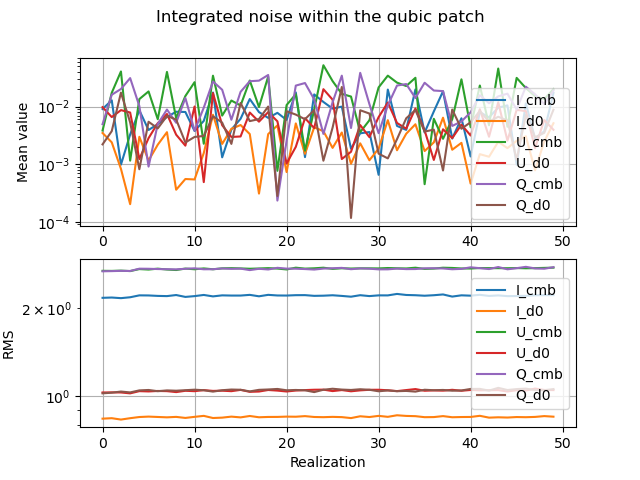

In [65]:
plt.figure()
plt.suptitle('Integrated noise within the qubic patch')
plt.subplot(2,1,1)
plt.ylabel('Mean value')
plt.semilogy(np.abs(I_int_cmb[:,-1]),label='I_cmb')
plt.semilogy(np.abs(I_int_d0[:,-1]),label='I_d0')
plt.semilogy(np.abs(U_int_cmb[:,-1]),label='U_cmb')
plt.semilogy(np.abs(U_int_d0[:,-1]),label='U_d0')
plt.semilogy(np.abs(Q_int_cmb[:,-1]),label='Q_cmb')
plt.semilogy(np.abs(Q_int_d0[:,-1]),label='Q_d0')
plt.grid()
plt.legend()
plt.subplot(2,1,2)
plt.ylabel('RMS')
plt.semilogy(dI_int_cmb[:,-1],label='I_cmb')
plt.semilogy(dI_int_d0[:,-1],label='I_d0')
plt.semilogy(dU_int_cmb[:,-1],label='U_cmb')
plt.semilogy(dU_int_d0[:,-1],label='U_d0')
plt.semilogy(dQ_int_cmb[:,-1],label='Q_cmb')
plt.semilogy(dQ_int_d0[:,-1],label='Q_d0')
plt.grid()
plt.xlabel('Realization')
plt.legend()

<IPython.core.display.Javascript object>


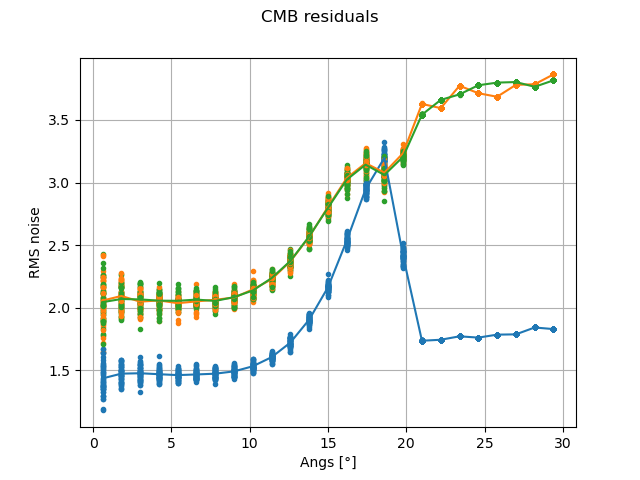

<IPython.core.display.Javascript object>


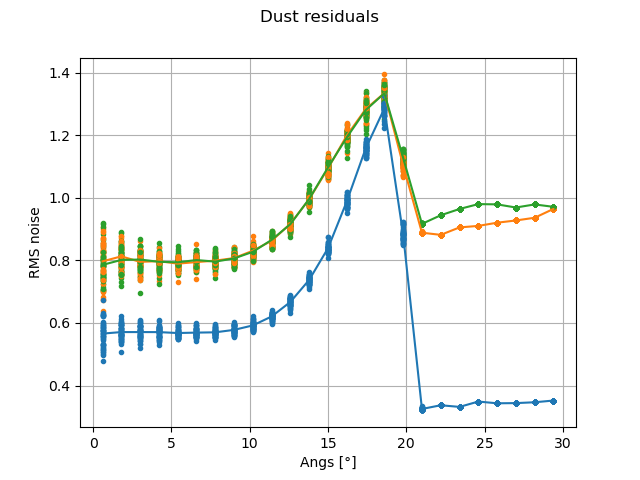

Text(0, 0.5, 'RMS noise')

In [66]:
plt.figure()
for i in range(nreals):
    plt.plot(angs_cmb,dI_cmb[i,:],'.',c='C0')
    plt.plot(angs_cmb,dU_cmb[i,:],'.',c='C1')
    plt.plot(angs_cmb,dQ_cmb[i,:],'.',c='C2')
plt.plot(angs_cmb,np.mean(dI_cmb,axis=0),c='C0')
plt.plot(angs_cmb,np.mean(dU_cmb,axis=0),c='C1')
plt.plot(angs_cmb,np.mean(dQ_cmb,axis=0),c='C2')
plt.suptitle('CMB residuals')
plt.grid()
plt.xlabel('Angs [°]')
plt.ylabel('RMS noise')

plt.figure()
for i in range(nreals):
    plt.plot(angs_d0,dI_d0[i,:],'.',c='C0')
    plt.plot(angs_d0,dU_d0[i,:],'.',c='C1')
    plt.plot(angs_d0,dQ_d0[i,:],'.',c='C2')
plt.plot(angs_d0,np.mean(dI_d0,axis=0),c='C0')
plt.plot(angs_d0,np.mean(dU_d0,axis=0),c='C1')
plt.plot(angs_d0,np.mean(dQ_d0,axis=0),c='C2')
plt.suptitle('Dust residuals')
plt.grid()
plt.xlabel('Angs [°]')
plt.ylabel('RMS noise')
    

<IPython.core.display.Javascript object>


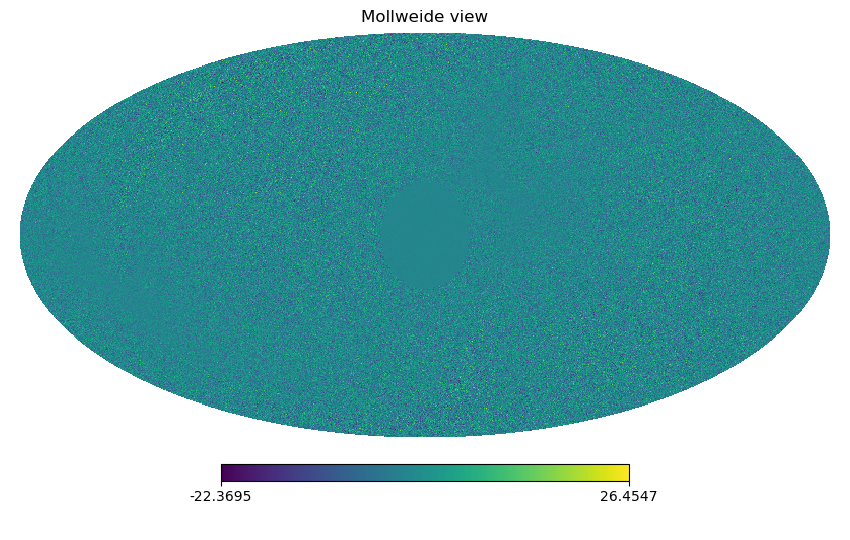

In [47]:
hp.mollview(np.mean(noise_maps,axis=0)[0,:,2],rot=center_gal)

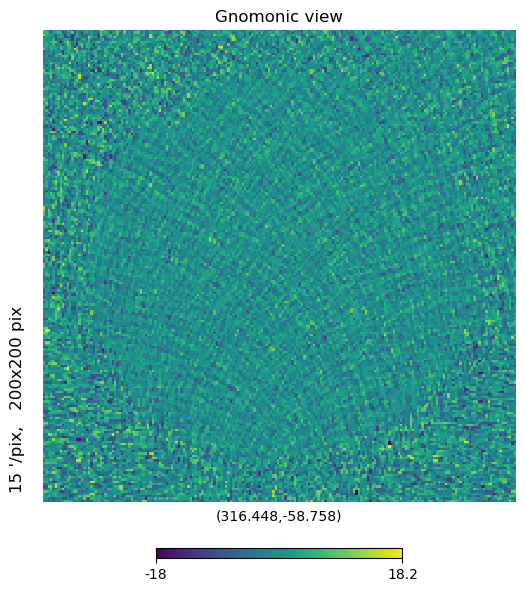

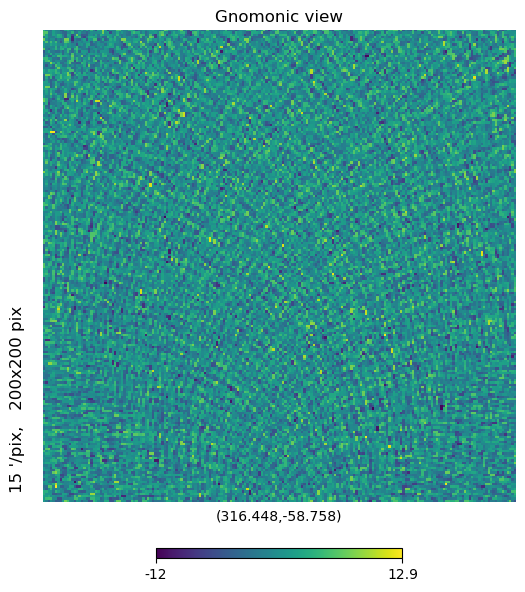

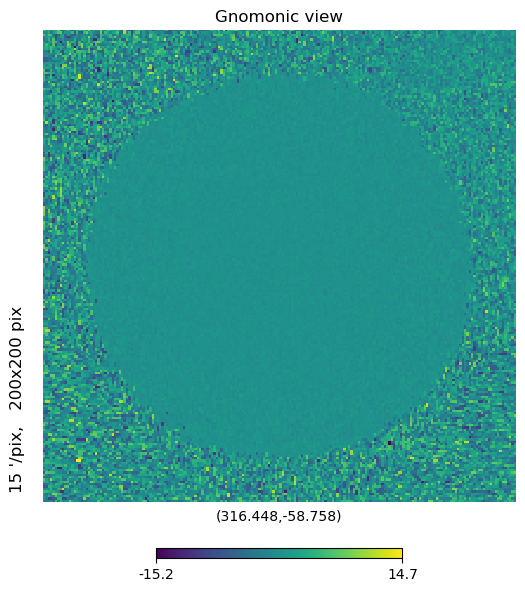

In [9]:
%matplotlib inline
hp.gnomview(np.mean(components_maps,axis=0)[0,:,2],rot=center_gal,reso=15)
hp.gnomview(np.mean(components_input_maps,axis=0)[0,:,2],rot=center_gal,reso=15)
hp.gnomview(np.mean(noise_maps,axis=0)[0,:,2],rot=center_gal,reso=15)

In [ ]:
components_maps_patch_plot = components_maps.copy()
components_maps_patch_plot[:,:,~seenpix,:] = hp.UNSEEN
components_input_maps_patch_plot = components_input_maps.copy()
components_input_maps_patch_plot[:,:,~seenpix,:] = hp.UNSEEN

<IPython.core.display.Javascript object>


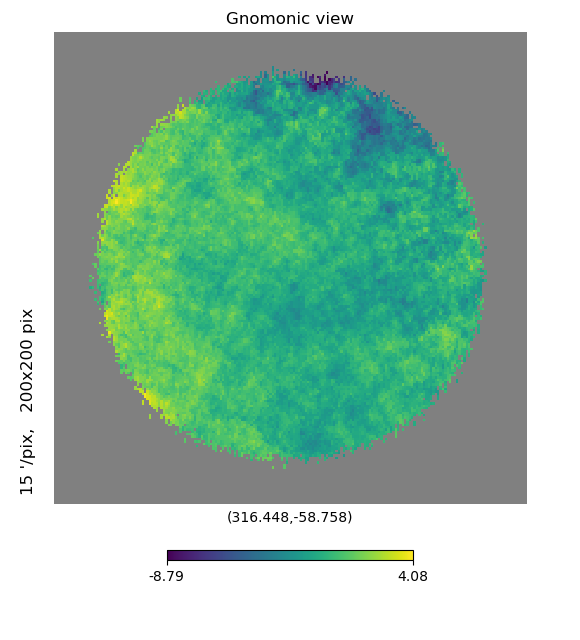

<IPython.core.display.Javascript object>


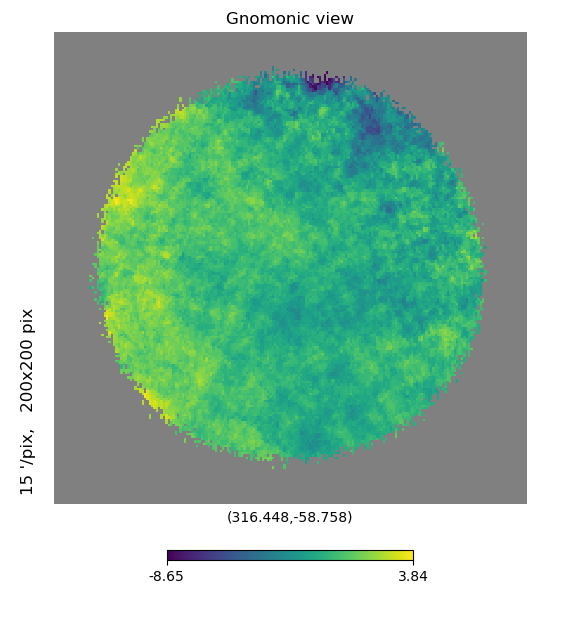

In [74]:
hp.gnomview(np.mean(components_maps_patch_plot,axis=0)[1,:,2],rot=center_gal,reso=15)
hp.gnomview(np.mean(components_input_maps_patch_plot,axis=0)[1,:,2],rot=center_gal,reso=15)
# hp.gnomview(np.mean(components_input_maps_patch,axis=0)[0,:,2],rot=center_gal,reso=15)
# hp.gnomview(np.mean(noise_maps_patch,axis=0)[0,:,2],rot=center_gal,reso=15)

In [35]:
# maxrms_percomp = np.zeros((len(dI_int_cmb[:,-1]),2))

# for i in range(len(maxrms_percomp[:,0])):
#     maxrms_percomp[i,0] = np.max([dI_int_cmb[i,-1], dU_int_cmb[i,-1], dQ_int_cmb[i,-1]])
#     maxrms_percomp[i,1] = np.max([dI_int_d0[i,-1], dU_int_d0[i,-1], dQ_int_d0[i,-1]])

# plt.figure()
# plt.loglog(maxrms_percomp[:,0])
# plt.loglog(maxrms_percomp[:,1])

In [34]:
# ite_conv = 10

# relative_variation_rms = np.zeros((len(maxrms_percomp[:,0])-(ite_conv-1),2))

# for i,ii in enumerate(np.arange(ite_conv-1,len(maxrms_percomp[:,0]))):
#     relative_variation_rms[i,0] = np.max((maxrms_percomp[ii-(ite_conv-1):ii,0]-maxrms_percomp[ii,0])/maxrms_percomp[ii,0])
#     relative_variation_rms[i,1] = np.max((maxrms_percomp[ii-(ite_conv-1):ii,1]-maxrms_percomp[ii,1])/maxrms_percomp[ii,1])

# plt.figure()

# plt.loglog(relative_variation_rms[:,0])
# plt.loglog(relative_variation_rms[:,1])


In [33]:
# plt.figure()
# plt.suptitle('Relative variation of the noise within the qubic patch')
# plt.subplot(2,1,1)
# plt.ylabel('Mean value')
# plt.plot(deltaI_int_cmb[:,-1],label='I_cmb')
# plt.plot(deltaI_int_d0[:,-1],label='I_d0')
# plt.plot(deltaU_int_cmb[:,-1],label='U_cmb')
# plt.plot(deltaU_int_d0[:,-1],label='U_d0')
# plt.plot(deltaQ_int_cmb[:,-1],label='Q_cmb')
# plt.plot(deltaQ_int_d0[:,-1],label='Q_d0')
# plt.grid()
# plt.legend(loc='center')
# plt.subplot(2,1,2)
# plt.ylabel('RMS')
# plt.plot(deltadI_int_cmb[:,-1],label='I_cmb')
# plt.plot(deltadI_int_d0[:,-1],label='I_d0')
# plt.plot(deltadU_int_cmb[:,-1],label='U_cmb')
# plt.plot(deltadU_int_d0[:,-1],label='U_d0')
# plt.plot(deltadQ_int_cmb[:,-1],label='Q_cmb')
# plt.plot(deltadQ_int_d0[:,-1],label='Q_d0')
# plt.grid()
# plt.xlabel('Iteration')
# plt.legend(loc='center')

# plt.figure()
# for i in range(int(1/3*len(angs))):
#     plt.subplot(2,1,1)
#     plt.plot(np.abs(deltaI[:,i]))
#     plt.subplot(2,1,2)
#     plt.plot(np.abs(deltadI[:,i]))

In [33]:
# plt.figure()
# for i in range(int(1/3*len(angs))):
#     plt.subplot(2,1,1)
#     plt.plot(I_int[:,i])
#     plt.subplot(2,1,2)
#     plt.plot(dI_int[:,i])
    
# plt.figure()
# for i in range(int(2/3*len(angs))):
#     plt.subplot(2,1,1)
#     plt.loglog(deltaI_int[:,i],'.')
#     plt.subplot(2,1,2)
#     plt.loglog(np.abs(deltadI_int[:,i]))

In [12]:
map_dict = pickle.load(open('bCMM_100_20_cmbonly.pkl','rb'))
noise_cmbonly = map_dict['components_i'] - map_dict['components']
coverage_cmbonly = map_dict['coverage']#it is the same for every realization
seenpix_cmbonly = map_dict['seenpix']#it is the same for every realization
noise_map_cmbonly = np.array(noise_cmbonly)
print(noise_map_cmbonly.shape)
print(coverage_cmbonly.shape)

(1, 786432, 3)
(786432,)


<IPython.core.display.Javascript object>


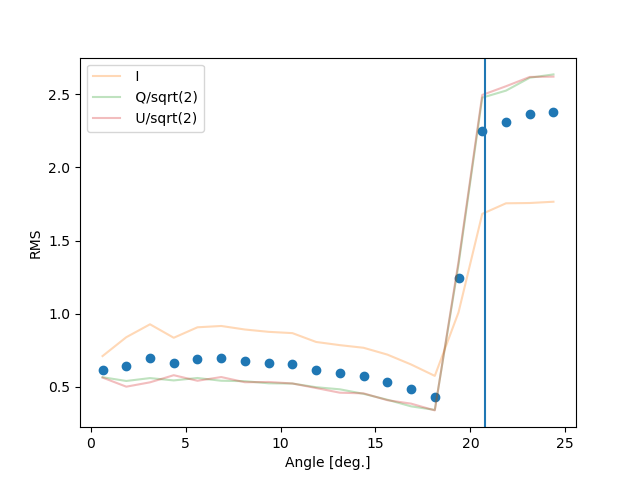

<IPython.core.display.Javascript object>


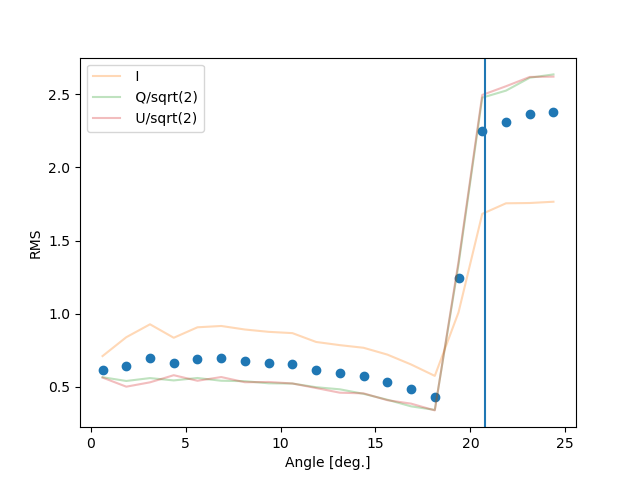

In [56]:
plt.figure()
angs,Imean,Qmean,Umean,dI,dQ,dU = qss.get_angular_profile(noise_maps[-1,0,:,:],doplot=True,allstokes=True,separate=True,center=center_gal)
plt.axvline(angmax)

plt.figure()
angs,Imean,Qmean,Umean,dI,dQ,dU = qss.get_angular_profile(noise_maps[-1,0,:,:],doplot=True,allstokes=True,separate=True)#,center=center_gal)
plt.axvline(angmax)

In [5]:
import qubic

# qubic.QubicSkySim.get_angles()

qubic.QubicSkySim#.qubic#.get_angles# qubic.get_angles

AttributeError: module 'qubic' has no attribute 'QubicSkySim'

<IPython.core.display.Javascript object>


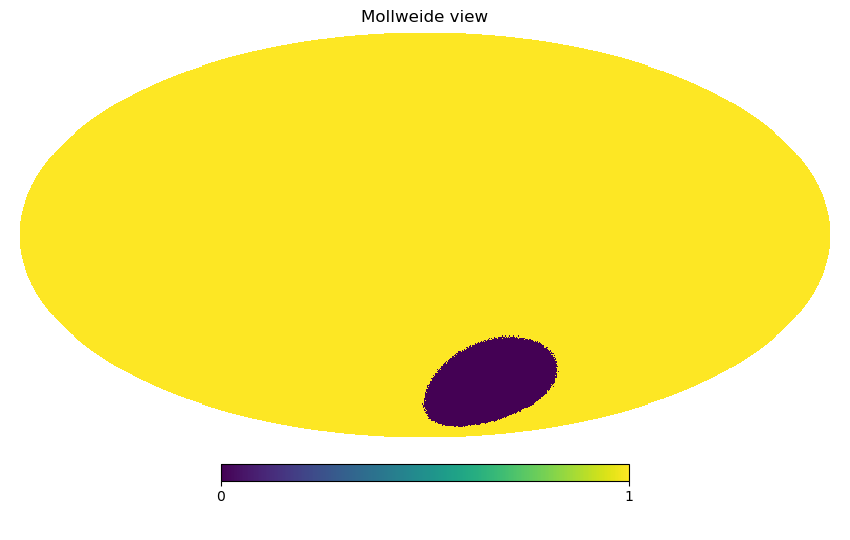

<IPython.core.display.Javascript object>


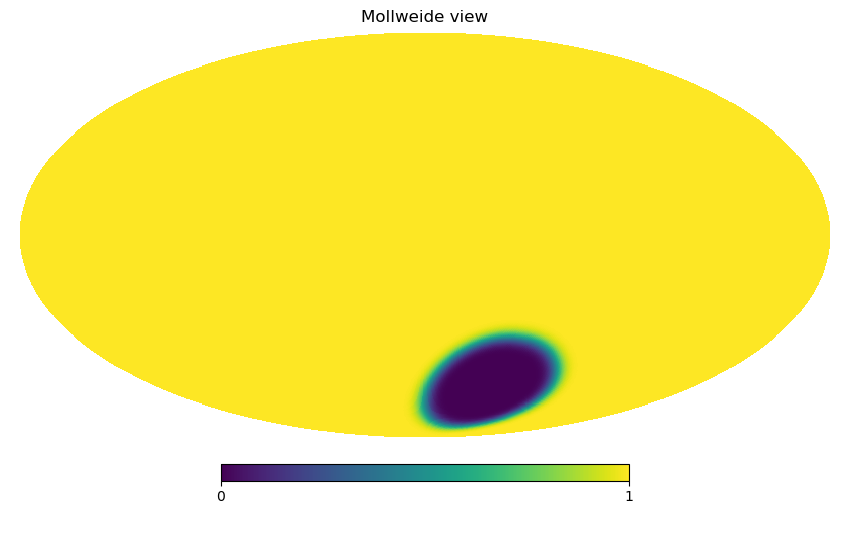

In [14]:
mask = np.ones(12*256**2)
mask[seenpix] = 0
# print(mask)

# plt.figure()
hp.mollview(mask)#, rot = center_equ)

C = HealpixConvolutionGaussianOperator(fwhm=0.1)
mask_conv = C(mask)
# plt.figure()
hp.mollview(mask_conv)


<IPython.core.display.Javascript object>


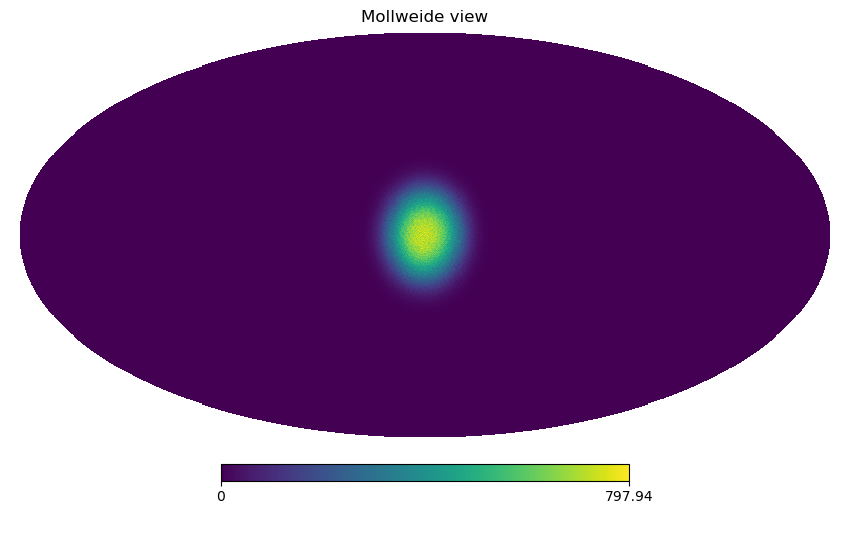

In [27]:
hp.mollview(coverage_cmbonly,rot=center_gal)
# center_gal 

In [34]:
pixsnum_seenpix = np.where(seenpix)[0]
centralpix = hp.ang2pix(256, center_gal[0],center_gal[1],lonlat=True)
angmax= np.max(qss.get_angles(centralpix,pixsnum_seenpix,256))

print(angmax)
# plt.figure()
# hp.pix2vec

20.77760958962067


<IPython.core.display.Javascript object>


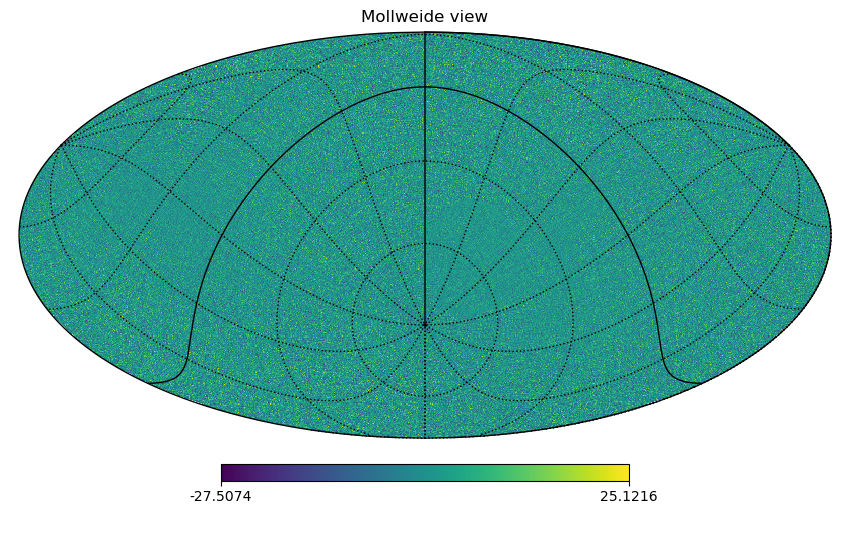

<IPython.core.display.Javascript object>


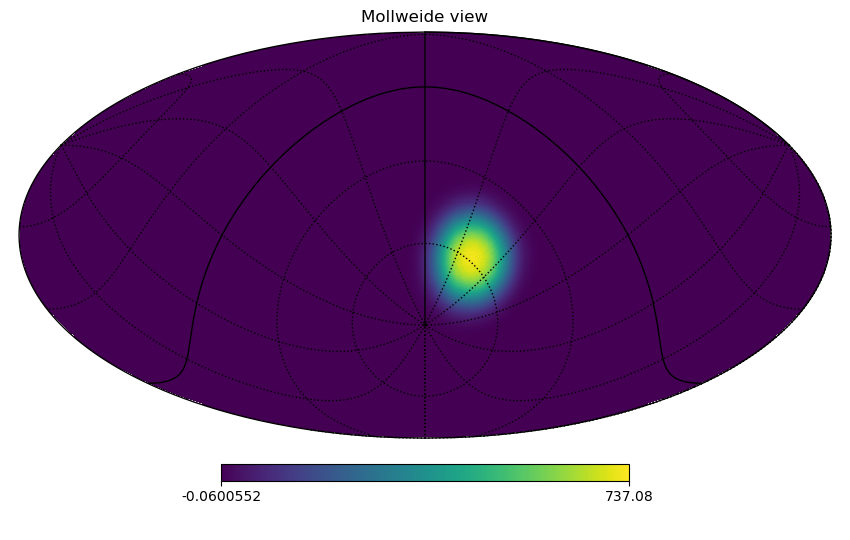

In [8]:
icomp = 0
istk = 1

thr = 0.2

seenpix = coverage/coverage.max() > thr
components[icomp,~seenpix] = hp.UNSEEN


# plt.figure()

hp.mollview(components[icomp, :, istk], rot = center_equ)
hp.graticule()
hp.mollview(convolution_plot(coverage), rot = center_equ)
hp.graticule()
# hp.mollview(components[icomp, :, istk], rot = center_gal)
# hp.graticule()
# hp.mollview(convolution_plot(coverage), rot = center_gal)
# hp.graticule()

<IPython.core.display.Javascript object>


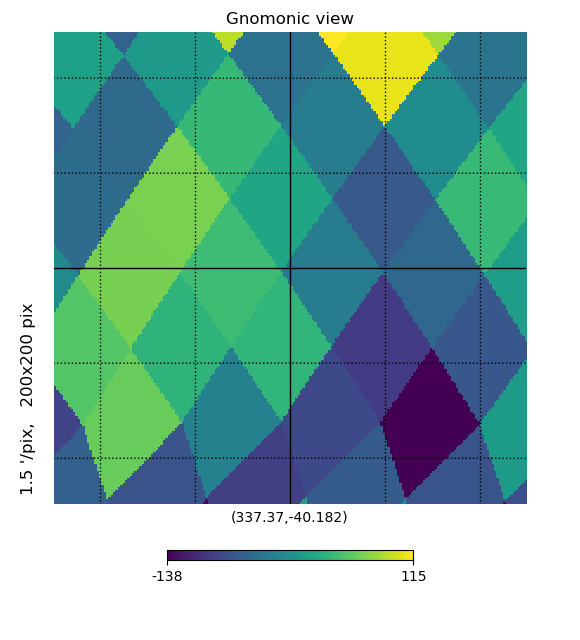

In [14]:
hp.gnomview(components[icomp, :, istk], rot = center_gal)#, reso = 18, notext=True, title='',
#                         cmap='jet')#, sub=(len(self.comps), 3, k+1), min=-2*sig, max=2*sig)
hp.graticule()
# plt.figure()

<IPython.core.display.Javascript object>


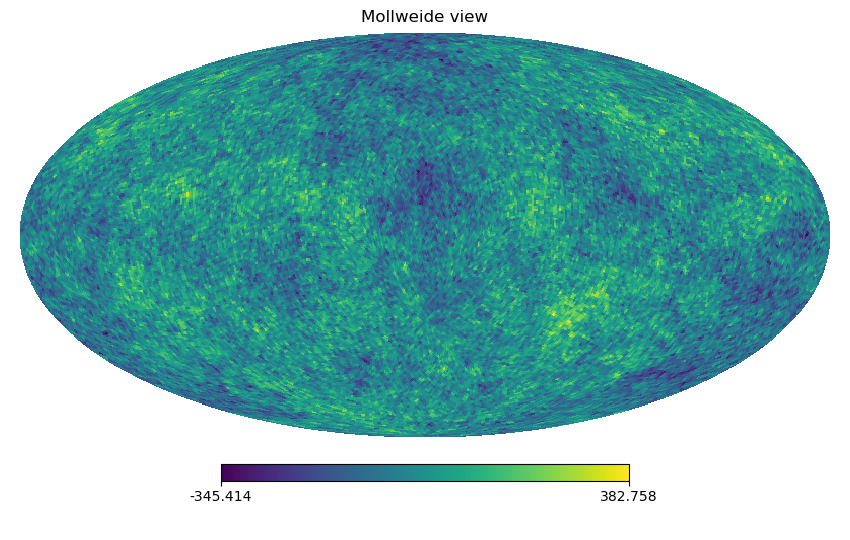

<IPython.core.display.Javascript object>


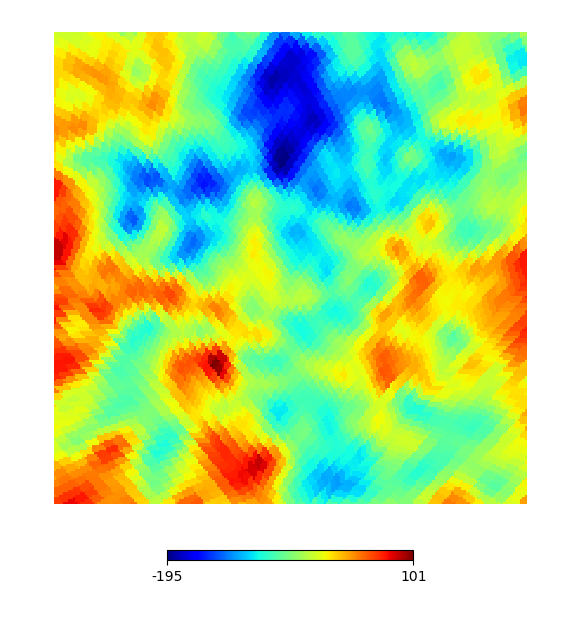

<IPython.core.display.Javascript object>


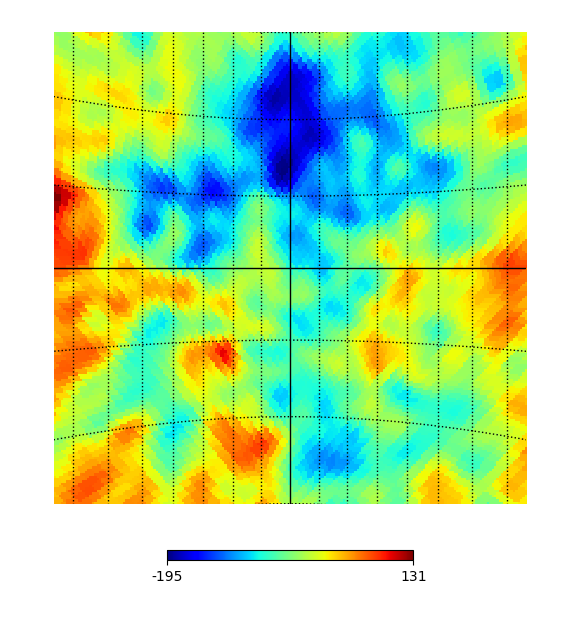

<IPython.core.display.Javascript object>


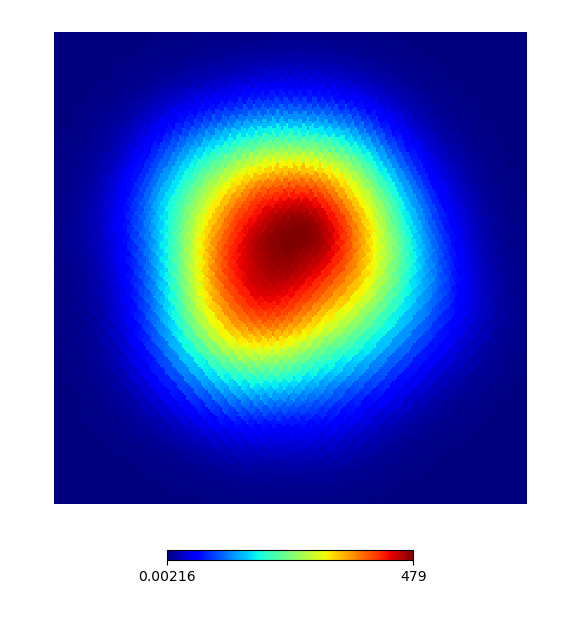

<IPython.core.display.Javascript object>


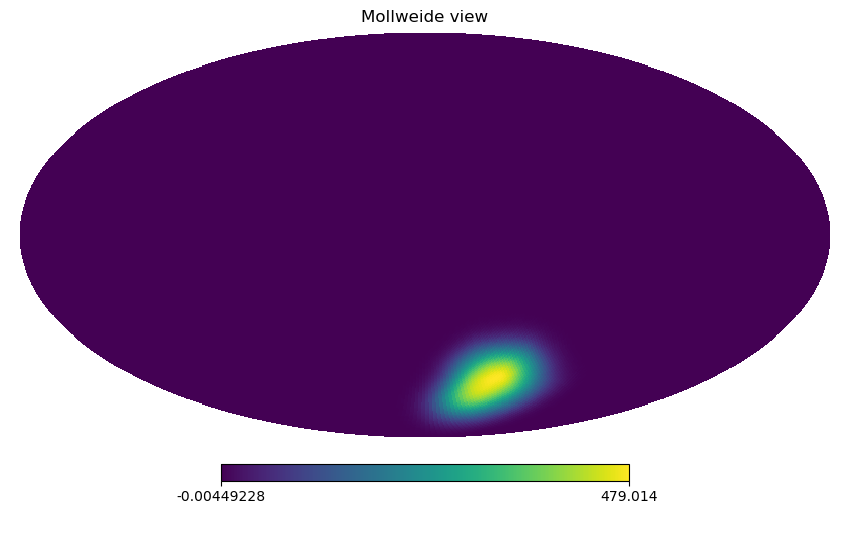

In [19]:
hp.mollview(components[icomp, :, istk], rot = center)

hp.gnomview(convolution_plot(components[icomp, :, istk]), rot = center, reso = 18, notext=True, title='',
                        cmap='jet')#, sub=(len(self.comps), 3, k+1), min=-2*sig, max=2*sig)

hp.gnomview(convolution_plot(components[icomp, :, istk]), rot = center, reso = 20, notext=True, title='',
                        cmap='jet')#, sub=(len(self.comps), 3, k+1), min=-2*sig, max=2*sig)
hp.graticule()
# plt.figure()

hp.gnomview(convolution_plot(coverage), rot = center, reso = 18, notext=True, title='',
                        cmap='jet')#, sub=(len(self.comps), 3, k+1), min=-2*sig, max=2*sig)

hp.mollview(convolution_plot(coverage))#, rot = center)

In [55]:
hp.nside2resol(64,arcmin=True)/60

0.9161297098179749

In [54]:
hp.nside2npix(64)

49152

In [ ]:
hp.mollview(mapsb,rot=[np.mean(newazt) + azqubic, np.mean(newelt)])
hp.graticule()
hp.projscatter(hp.pix2ang(nside, posmax[0][0]), color = 'k', marker = '*', s = 200)


In [ ]:
%matplotlib notebook
unseen = (mapsb == hp.UNSEEN) | (mapsb_pos == hp.UNSEEN) | (mapsb_neg == hp.UNSEEN)
mapdiff = mapsb_pos - mapsb_neg
mapdiff[unseen] = hp.UNSEEN
posmax = np.where(mapsb == mapsb.max())
mapret = hp.gnomview(mapdiff, return_projected_map = True, 
                     #rot=[np.mean(newazt) + azqubic, np.mean(newelt)], reso = 15, xsize = 200)
                     rot=[-np.array([np.pi/2+1,0])+ hp.pix2ang(nside, posmax[0])], reso = 3, xsize = 200)



print(posmax[0][0])
hp.graticule()
hp.projscatter(hp.pix2ang(nside, posmax[0]), color = 'r', marker = '*', s = 200)
hp.projscatter(np.pi/2 - np.radians(np.mean(newelt)), np.radians(np.mean(newazt) + azqubic), 
color = 'k', marker = '*', s = 200)

In [ ]:
figure()
plt.hist(np.log(np.abs(mapret)),bins=10)

In [ ]:
center_map_phi =  3 - hp.pix2ang(nside, posmax[0])[1]
center_map_th =  np.pi/2 - hp.pix2ang(nside, posmax[0])[0]
print(hp.pix2ang(nside, posmax[0]))
x = np.linspace(-100,100, 200)*1.5/60 - np.degrees(center_map_phi)
y = np.linspace(-100,100, 200)*1.5/60 - np.degrees(center_map_th)
plt.imshow(mapret[::-1], extent = [x[0], x[-1],
                                   y[-1],y[0]])